<a href="https://colab.research.google.com/github/TausifAnsari/Nature-Classifier/blob/master/classifier_nature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"tausifansari7","key":"e1bcd373a7be08b26427050c943b553e"}'}

In [0]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 69 Sep 21 19:02 kaggle.json


In [0]:
# Install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d puneet6060/intel-image-classification

 95% 328M/344M [00:02<00:00, 111MB/s] 
100% 344M/344M [00:03<00:00, 119MB/s]


In [0]:
!mkdir TrainData
!unzip /content/intel-image-classification.zip -d /content/TrainData

In [0]:
!mkdir /content/TrainData/Train
!mkdir /content/TrainData/test
!mkdir /content/TrainData/predict
!unzip /content/TrainData/seg_train.zip -d /content/TrainData/Train
!unzip /content/TrainData/seg_test.zip -d /content/TrainData/test
!unzip /content/TrainData/seg_pred.zip -d /content/TrainData/predict

In [0]:
import numpy as np                          # linear algebra
import os                                   # used for loading the data
from sklearn.utils import shuffle           # shuffle the data
import matplotlib.pyplot as plt             # 2D plotting library
import cv2                                  # image processing library
import tensorflow as tf                     # Machine Learning library
from keras import layers
from keras import models

Using TensorFlow backend.


In [0]:
# Here's our 6 categories that we have to classify.
class_names = ['mountain', 'street', 'glacier', 'buildings', 'sea', 'forest']
class_names_label = {'mountain': 0,
                    'street' : 1,
                    'glacier' : 2,
                    'buildings' : 3,
                    'sea' : 4,
                    'forest' : 5
                    }
nb_classes = 6

In [0]:
def load_data():
    """
        Load the data:
            - 14,034 images to train the network.
            - 10,000 images to evaluate how accurately the network learned to classify images.
    """
    
    datasets = ['/Train/seg_train', '/test/seg_test']
    size = (150,150)
    output = []
    for dataset in datasets:
        directory = "/content/TrainData" + dataset
        images = []
        labels = []
        for folder in os.listdir(directory):
            curr_label = class_names_label[folder]
            for file in os.listdir(directory + "/" + folder):
                img_path = directory + "/" + folder + "/" + file
                curr_img = cv2.imread(img_path)
                curr_img = cv2.resize(curr_img, size)
                images.append(curr_img)
                labels.append(curr_label)
        images, labels = shuffle(images, labels)     ### Shuffle the data !!!
        images = np.array(images, dtype = 'float32') ### Our images
        labels = np.array(labels, dtype = 'int32')   ### From 0 to num_classes-1!
        
        output.append((images, labels))

    return output

In [0]:
(train_images, train_labels), (test_images, test_labels) = load_data()

In [0]:
print ("Number of training examples: " + str(train_labels.shape[0]))
print ("Number of testing examples: " + str(test_labels.shape[0]))
print ("Each image is of size: " + str(train_images.shape[1:]))

Number of training examples: 14034
Number of testing examples: 3000
Each image is of size: (150, 150, 3)


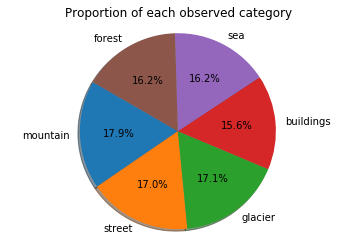

In [0]:
# Plot a pie chart
sizes = np.bincount(train_labels)
explode = (0, 0, 0, 0, 0, 0)  
plt.pie(sizes, explode=explode, labels=class_names,
autopct='%1.1f%%', shadow=True, startangle=150)
plt.axis('equal')
plt.title('Proportion of each observed category')

plt.show()

In [0]:
train_images = train_images / 255.0 
test_images = test_images / 255.0

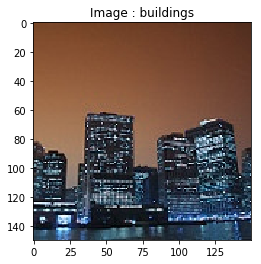

In [0]:
index = np.random.randint(train_images.shape[0])
plt.figure()
plt.imshow(train_images[index])
plt.grid(False)
plt.title('Image : ' + class_names[train_labels[index]])
plt.show()

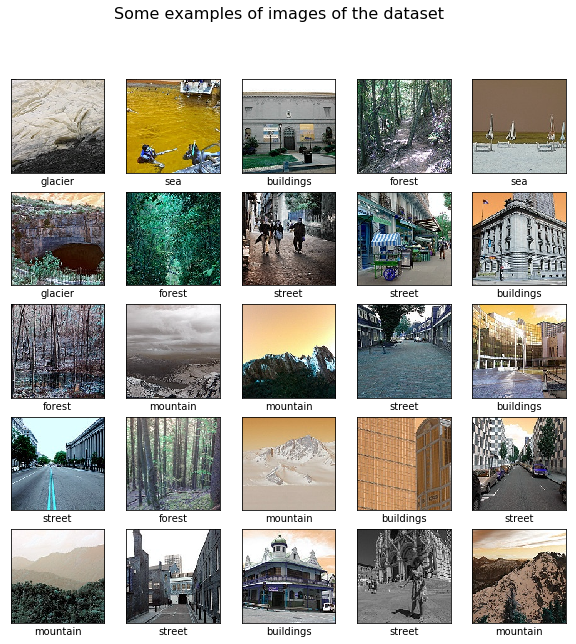

In [0]:
fig = plt.figure(figsize=(10,10))
fig.suptitle("Some examples of images of the dataset", fontsize=16)
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())

model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(6, activation='softmax'))

model.compile(loss = 'sparse_categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(train_images, train_labels, batch_size=128, epochs=15, validation_split = 0.1)

Train on 12630 samples, validate on 1404 samples
Epoch 1/15
12630/12630 [==============================] - 14s 1ms/step - loss: 1.2646 - acc: 0.5164 - val_loss: 0.9038 - val_acc: 0.6702
Epoch 2/15
12630/12630 [==============================] - 13s 1ms/step - loss: 0.8817 - acc: 0.6776 - val_loss: 0.7464 - val_acc: 0.7279
Epoch 3/15
12630/12630 [==============================] - 13s 1ms/step - loss: 0.7400 - acc: 0.7342 - val_loss: 0.6931 - val_acc: 0.7479
Epoch 4/15
12630/12630 [==============================] - 13s 1ms/step - loss: 0.6274 - acc: 0.7771 - val_loss: 0.5959 - val_acc: 0.7870
Epoch 5/15
12630/12630 [==============================] - 13s 1ms/step - loss: 0.5311 - acc: 0.8122 - val_loss: 0.6219 - val_acc: 0.7764
Epoch 6/15
12630/12630 [==============================] - 13s 1ms/step - loss: 0.4533 - acc: 0.8454 - val_loss: 0.5921 - val_acc: 0.8041
Epoch 7/15
12630/12630 [==============================] - 13s 1ms/step - loss: 0.3820 - acc: 0.8678 - val_loss: 0.6303 - val_acc:

In [0]:
model.save('nature_model.h5')

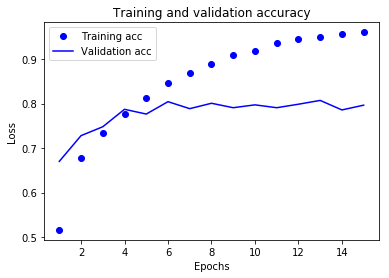

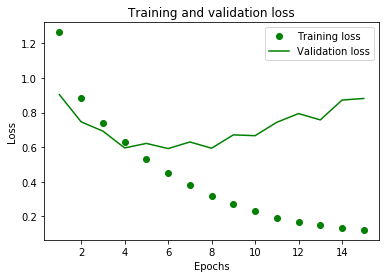

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.figure()


plt.plot(epochs, loss, 'go', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Prediction : forest VS Correct : forest  




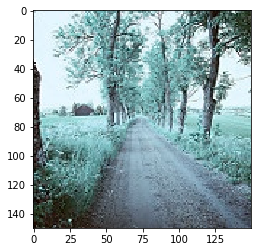

In [0]:
index = np.random.randint(test_images.shape[0]) # We choose a random index

img = (np.expand_dims(test_images[index], 0))
predictions = model.predict(img)     # Vector of probabilities
pred_img = np.argmax(predictions[0]) # We take the highest probability
pred_label = class_names[pred_img]
true_label = class_names[test_labels[index]] 

print('Prediction : {} VS Correct : {}  '.format(pred_label , true_label ))
print('\n')

plt.figure()
plt.imshow(test_images[index])
plt.grid(False)
plt.show()

	Given image is : glacier 




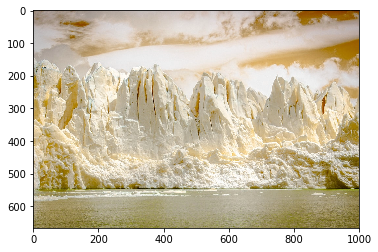

In [0]:
def prepare(filepath):
    img_size = 150  
    img_array = cv2.imread(filepath,)
    img_new_array = cv2.resize(img_array, (img_size, img_size))
    img_new_array = img_new_array.reshape(img_size, img_size, 3)
    return (np.expand_dims(img_new_array, 0))
    
test_img1 = '/content/glacier.jpg'
prediction1 = model.predict([prepare(test_img1)])
pred_img1 = np.argmax(prediction1[0])
pred_label1 = class_names[pred_img1]
print("\tGiven image is : {} ".format(pred_label1))
print('\n')
plt.figure()
test_img_array = cv2.imread(test_img1)
plt.imshow(test_img_array)
plt.show()